<a href="https://colab.research.google.com/github/sandipiitp/classification/blob/master/kaggle_titanic_pycaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

importing modules

In [1]:
import os, sys
from google.colab import drive

drive.mount('/content/drive')
nb_path = '/content/notebooks'
os.symlink('/content/drive/My Drive/Colab Notebooks', nb_path)
#os.chdir("drive/My Drive/Colab Notebooks/titanic/")
sys.path.insert(0,nb_path)

#!pip install --target=$nb_path pycaret

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import pandas as pd
import pandas_profiling
from pycaret.classification import *

import matplotlib.pyplot as plt
plt.style.use('ggplot')

import warnings
warnings.simplefilter('ignore')

os.chdir("drive/My Drive/Colab Notebooks/titanic/")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


functions

In [3]:
def feat_imp_n_prep(data):
    exp_clf = setup(data, target = 'Survived',session_id=123,
                    numeric_imputation='median',
                    categorical_imputation='mode'
                   )
    
    dt = create_model('dt')
    rf = create_model('rf')
    ada = create_model('ada')
    xgb = create_model('xgboost')
    et = create_model('et')
    
    tuned_dt = tune_model('dt')
    tuned_rf = tune_model('rf')
    tuned_ada = tune_model('ada')
    tuned_xgb = tune_model('xgboost')
    tuned_et = tune_model('et')
    
    clfs = [tuned_dt,tuned_rf,tuned_ada,tuned_xgb,tuned_et]
    algos=['Decision Tree','Random Forest','Adaboost',
           'XgBoost','Extra Trees Classifier']
    
    '''
    for clf in clfs:
       plt.plot(str(clf)) 
       plot_model(clf, plot='feature')'''
    
    plt_feat = lambda clf: plot_model(clf, plot='feature',)
    for algo,clf in zip(algos,clfs):
        #plt.title(algo)
        plt_feat(clf)
        del clf

def final_model(train,test):
  exp_clf = setup(train, target = 'Survived',session_id=123,
                    numeric_imputation='median',
                    categorical_imputation='mode'
                   )
  rf = create_model('rf')
  tuned_rf = tune_model('rf')
  final_rf = finalize_model(tuned_rf)
  test_result = predict_model(final_rf, data=test)
  return(test_result)

main

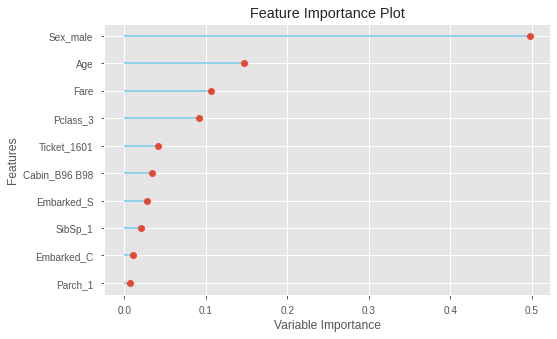

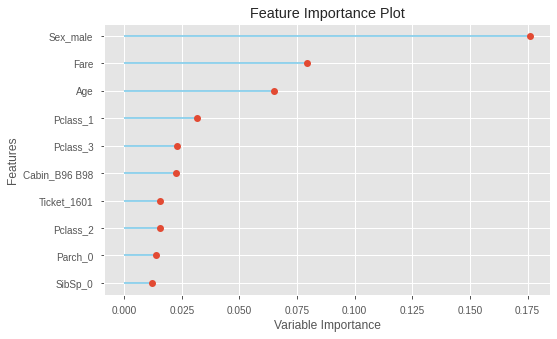

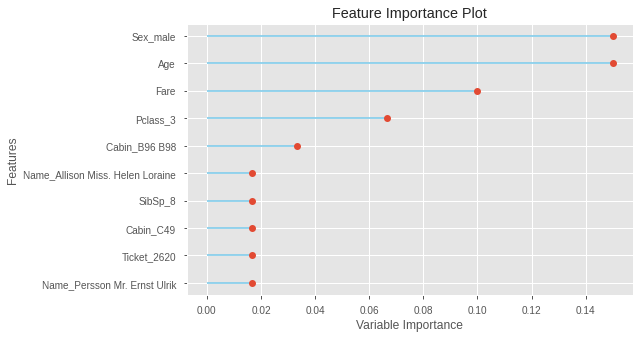

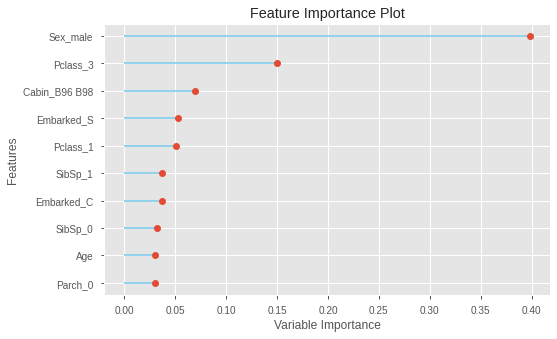

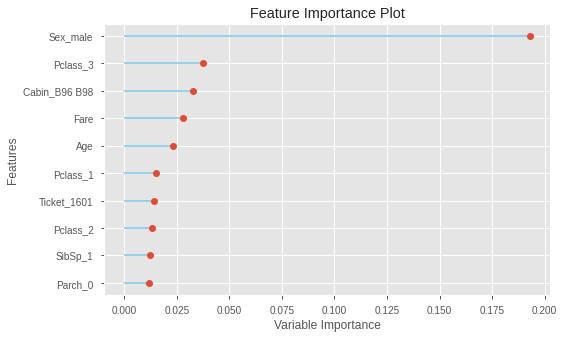

In [5]:
if __name__=="__main__":
    global train
    global test
    global gender_submission

    train = pd.read_csv('train.csv')
    test = pd.read_csv('test.csv')
    gender_submission = pd.read_csv('gender_submission.csv')
    
    #eda
    #pandas_profiling.ProfileReport(train,title="EDA")

    #feature importance
    feat_imp_n_prep(train)

In [ ]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
feature_set_train= ['Survived', 'Sex', 'Age', 'Fare','Pclass','Cabin','SibSp','Parch','Ticket']
feature_set_test= ['Sex', 'Age', 'Fare','Pclass','Cabin','SibSp','Parch','Ticket']
#test.columns

In [7]:
test_result=final_model(train[feature_set_train],test[feature_set_test])
test_result.head(5)

,Sex,Age,Fare,Pclass,Cabin,SibSp,Parch,Ticket,Label,Score
0,male,34.5,7.8292,3,NaN,0,0,330911,0,0.0319
1,female,47.0,7.0000,3,NaN,1,0,363272,0,0.3000
2,male,62.0,9.6875,2,NaN,0,0,240276,0,0.3375
3,male,27.0,8.6625,3,NaN,0,0,315154,0,0.0842
4,female,22.0,12.2875,3,NaN,1,1,3101298,0,0.3575


In [8]:
test_result = test_result.rename(columns={'Label':'Survived'})

In [9]:
test_result.head()

,Sex,Age,Fare,Pclass,Cabin,SibSp,Parch,Ticket,Survived,Score
0,male,34.5,7.8292,3,NaN,0,0,330911,0,0.0319
1,female,47.0,7.0000,3,NaN,1,0,363272,0,0.3000
2,male,62.0,9.6875,2,NaN,0,0,240276,0,0.3375
3,male,27.0,8.6625,3,NaN,0,0,315154,0,0.0842
4,female,22.0,12.2875,3,NaN,1,1,3101298,0,0.3575


In [10]:
final_df=pd.concat([test['PassengerId'],test_result['Survived']],axis=1)
final_df.to_csv("gender_submission.csv",index=False)